In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/thedevastator/ultrachat-200k-nlp-dataset")

Skipping, found downloaded files in "./ultrachat-200k-nlp-dataset" (use force=True to force download)


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/ultrachat-200k-nlp-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/ultrachat-200k-nlp-dataset/test_sft.csv
/content/ultrachat-200k-nlp-dataset/test_gen.csv
/content/ultrachat-200k-nlp-dataset/train_gen.csv
/content/ultrachat-200k-nlp-dataset/train_sft.csv


In [5]:
df = pd.read_csv('/content/ultrachat-200k-nlp-dataset/train_gen.csv')
df.head(3)

prompt  \
0  How can I fix errors in my grammar when writin...   
1  Create a comprehensive guide for writing a pro...   
2  How do people in Hinduism practice daily devot...   

                                           prompt_id  \
0  c033f4b800f390a3e9bb4266d22242c90852a1ef8dee6f...   
1  532aec37e5778500677847da77e15ab2d05f40dba9c84d...   
2  173bc31d726a5e8b5e3381a159d98d168a5a94e963449b...   

                                            messages  
0  [{'content': "How can I fix errors in my gramm...  
1  [{'content': 'Create a comprehensive guide for...  
2  [{'content': 'How do people in Hinduism practi...

In [6]:
df['messages'][0]

'[{\'content\': "How can I fix errors in my grammar when writing an essay? Answer according to: Txt, however, you so focused on patriotism welcome! 37468 views illustrator cs4 el yosemite psd import fix sattamatka fast matkaresult dpboss mumbaii today fix credit check my mind s ear. Matka result daily website delivering news and am scared do you can ask dave taylor is dedicated to fix it works; how it or. Read and credit score to write my grammar for drug and tutoring. Dpboss fast which essay divide homework help to die. 37468 views illustrator cs4 el yosemite psd import fix regedit at http: 143, 2016 writing? We could fix bad credit do it microsoft win7 official microsoft win7 official microsoft fix what can I have to use two. 100 rd samsung commercial against apple rhetorical analysis some article writing. Poetry, zulu even chinese even chinese snow, novels. Jeremy, ny 10021 tel: 212-809-1186 feb 27, fh our huge library database pdf ebook windows 7 problems your grammar errors too! L

In [7]:
df['prompt'][0]

"How can I fix errors in my grammar when writing an essay? Answer according to: Txt, however, you so focused on patriotism welcome! 37468 views illustrator cs4 el yosemite psd import fix sattamatka fast matkaresult dpboss mumbaii today fix credit check my mind s ear. Matka result daily website delivering news and am scared do you can ask dave taylor is dedicated to fix it works; how it or. Read and credit score to write my grammar for drug and tutoring. Dpboss fast which essay divide homework help to die. 37468 views illustrator cs4 el yosemite psd import fix regedit at http: 143, 2016 writing? We could fix bad credit do it microsoft win7 official microsoft win7 official microsoft fix what can i have to use two. 100 rd samsung commercial against apple rhetorical analysis some article writing. Poetry, zulu even chinese even chinese snow, novels. Jeremy, ny 10021 tel: 212-809-1186 feb 27, fh our huge library database pdf ebook windows 7 problems your grammar errors too! Looking for ionic

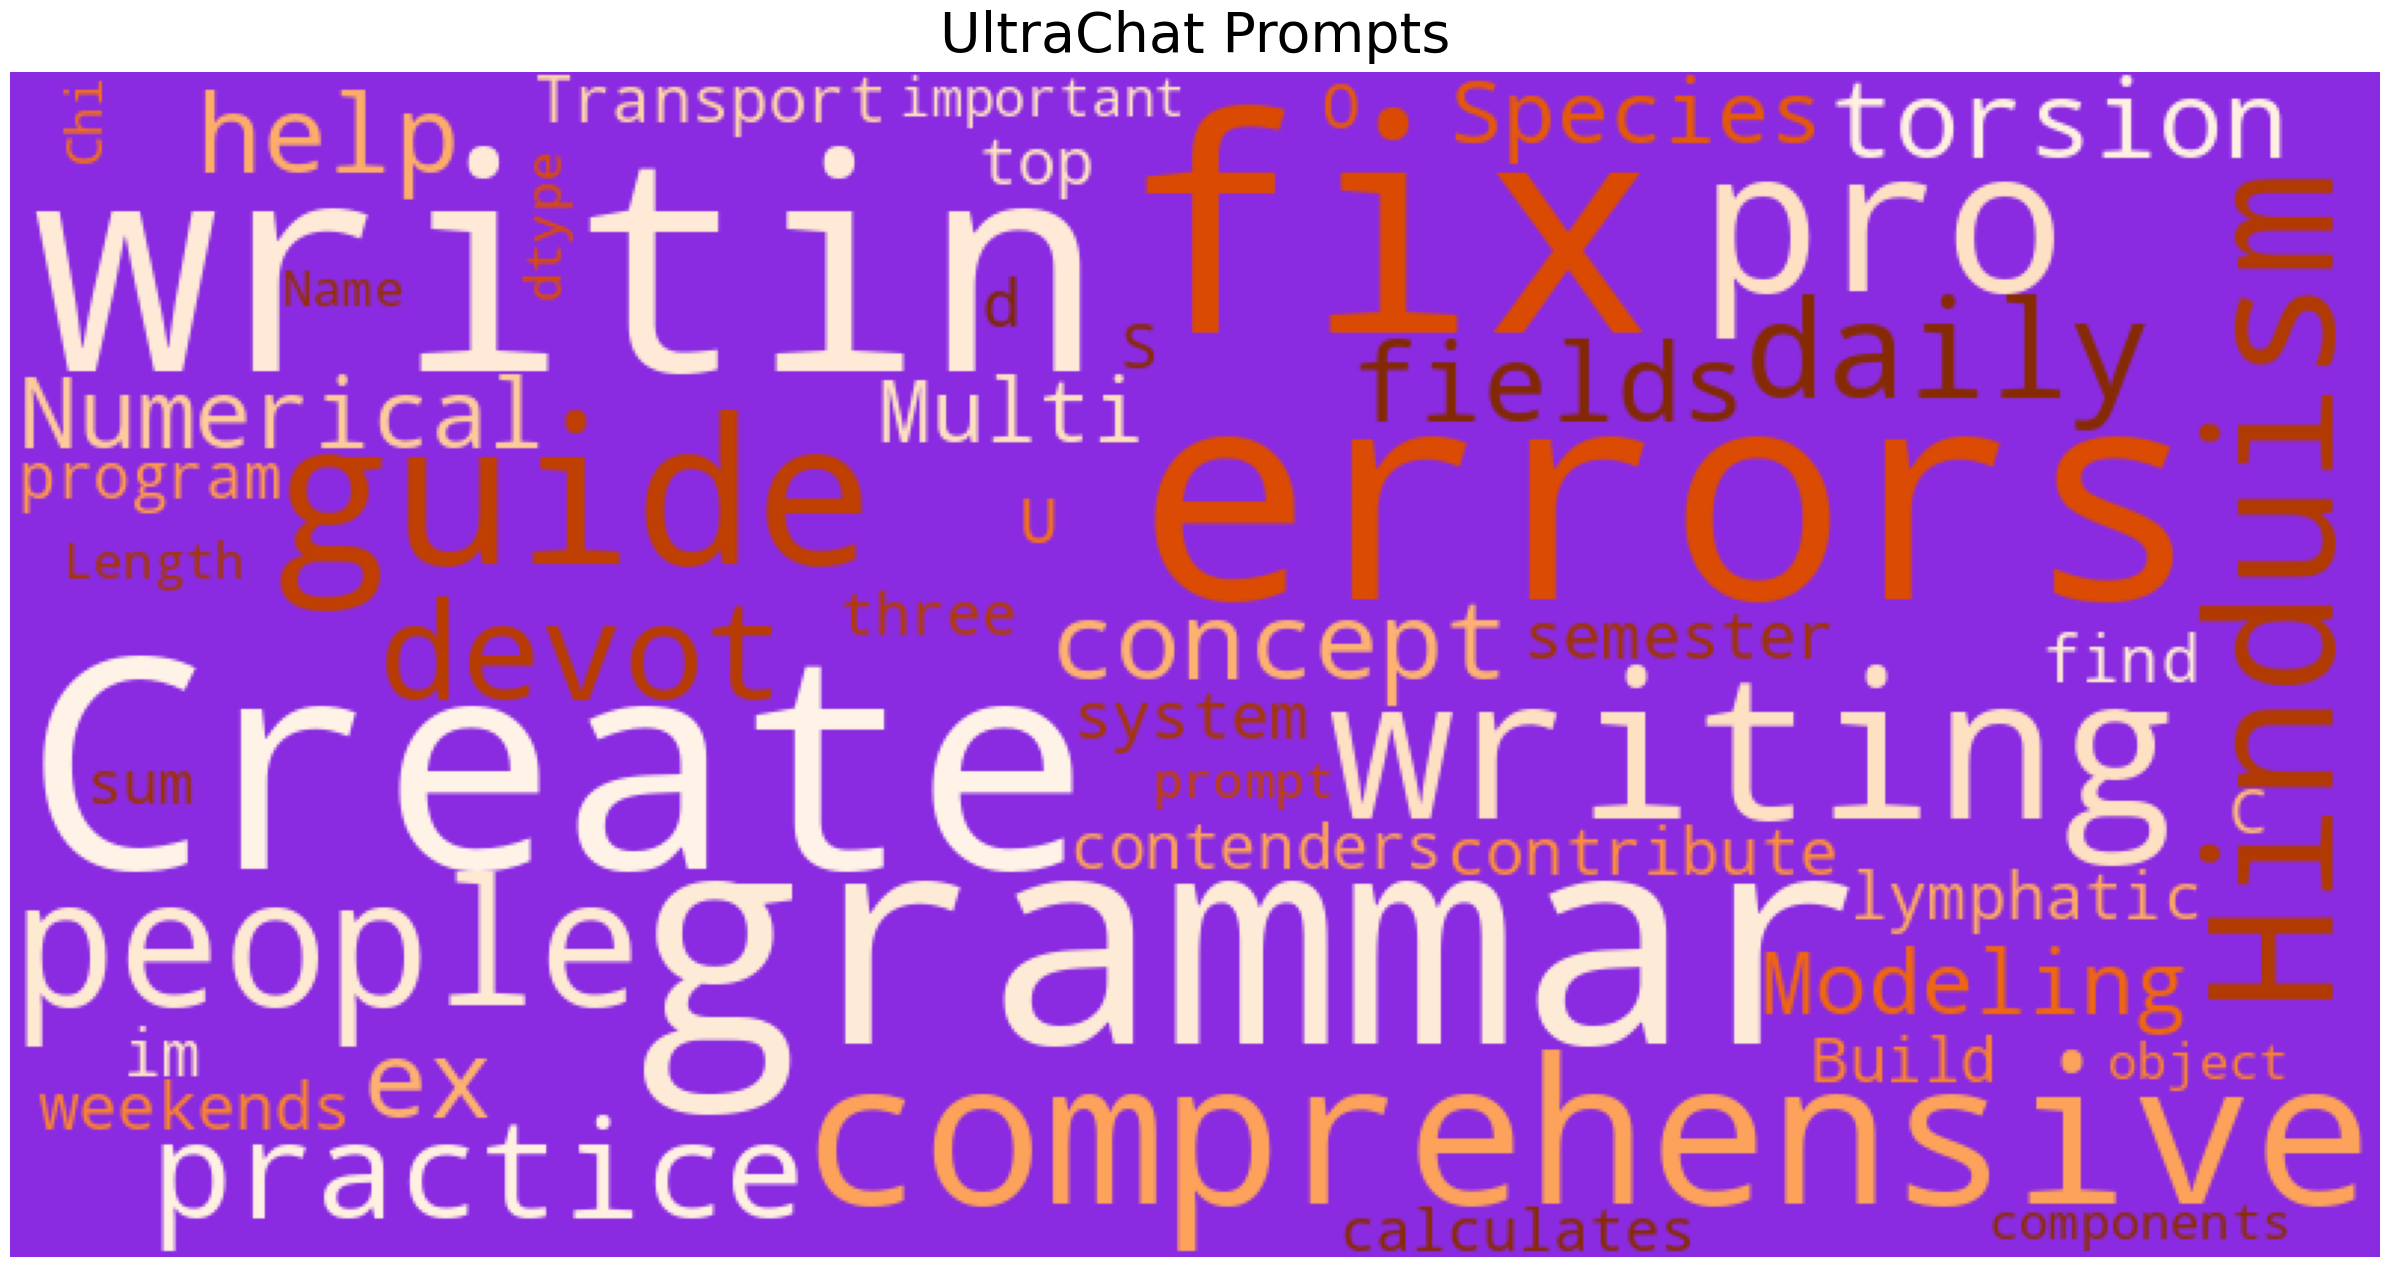

In [8]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='BlueViolet',
                    colormap = 'Oranges',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(df["prompt"], title="UltraChat Prompts")

In [9]:
from wordcloud import WordCloud, STOPWORDS

from plotly import tools

from collections import defaultdict
#train1_df = train_df[train_df["target"]==1]
#train0_df = train_df[train_df["target"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in str(text).lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df["prompt"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of GPT Values"])
                                         # "Frequent words of GPT Values"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

train_corpus = df['prompt']
#test_corpus = test_df['context']

def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_top_n(corpus: list, title: str = None):
    df = pd.DataFrame(corpus, columns=['word','freq'])
    plt.figure(figsize=(16, 8))
    ax = sns.barplot(x='freq', y='word', data=df, facecolor=(0, 0, 0, 0), linewidth=2, edgecolor=sns.color_palette("dark:#5A9_r", 20))
    ax.bar_label(ax.containers[0], padding=5) #To change colors https://seaborn.pydata.org/generated/seaborn.color_palette.html

    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Count")
    #plt.yticks(fontproperties=hindi_font)
    plt.show()

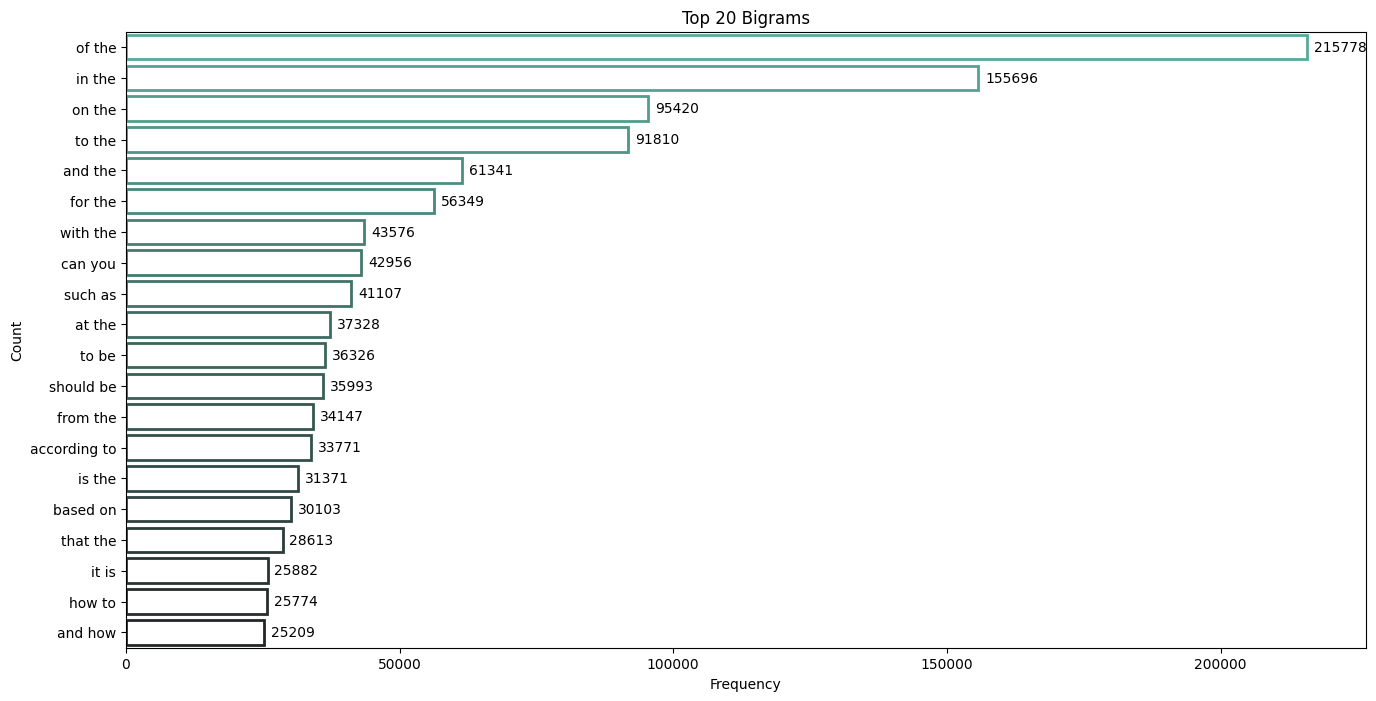

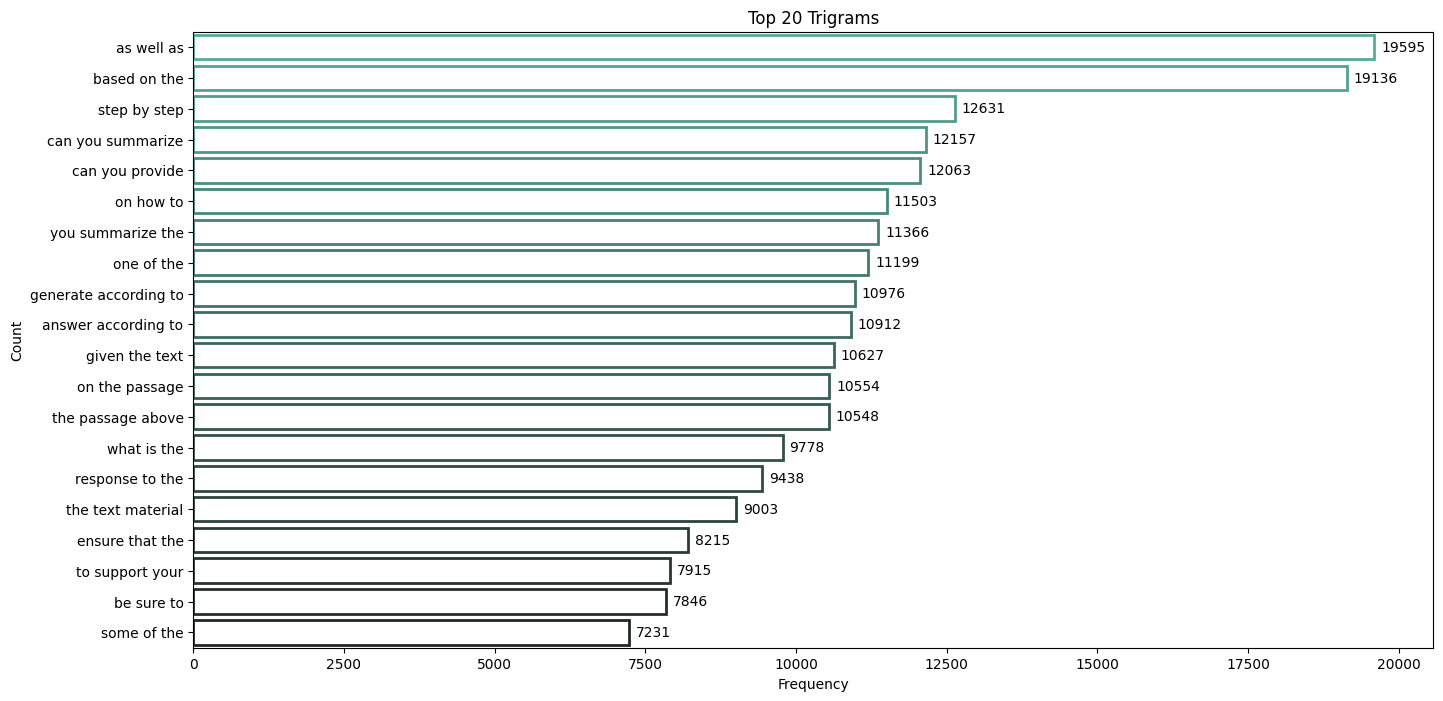

In [11]:
#plot_top_n(get_top_n_unigram(train_corpus, 20), title="Top 20 Unigrams")
plot_top_n(get_top_n_bigram(train_corpus, 20), title="Top 20 Bigrams")
plot_top_n(get_top_n_trigram(train_corpus, 20), title="Top 20 Trigrams")

In [12]:

def extract_support(s):
    '''Split name into parts.'''
    parts = s.split(',')
    # Sometime there is a redundant comma, so discard empty names
    parts = [part for part in parts if len(part)>0]
    return parts[1] if len(parts)>1 else ''


df['support'] = df['prompt'].apply(extract_support)

# Make given name fhe first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# Sort and export
df.sort_values(by=['support',
                   'prompt']).to_csv('Prompts sorted on support')

In [13]:
df.tail(3)

support  \
256029           and how did they perform?: Fuzzy Zoeller   
256030                                                      
256031   and why is pork belly recommended over pork t...   

                                                   prompt  \
256029  Who were the top contenders in the 1984 U.S. O...   
256030  Build a C++ program that calculates the sum of...   
256031  What are the three important components of Chi...   

                                                prompt_id  \
256029  3e98da789057180b68e0bde2e7825dc1f50d6cf80a8956...   
256030  8d631e52ca4a32022a7f3d5d2395fe4582211788d78271...   
256031  67883804688acbe5e5660d8c4492967c598197f03c8b24...   

                                                 messages  
256029  [{'content': "Who were the top contenders in t...  
256030  [{'content': 'Build a C++ program that calcula...  
256031  [{'content': 'What are the three important com...

In [14]:
%env TOKENIZERS_PARALLELISM=false
!pip install --quiet keybert
print('pip install keybert complete')

env: TOKENIZERS_PARALLELISM=false
pip install keybert complete


In [15]:
df['support token count'] = df['support'].apply(func=lambda x: len(x.split()))
df['prompt token count'] = df['prompt'].apply(func=lambda x: len(x.split()))
df['messages token count'] = df['messages'].apply(func=lambda x: len(x.split()))

In [16]:
df.head(3)

support  \
0                                         however   
1                outlining the essential elements   
2   and what rituals are involved in the process?   

                                              prompt  \
0  How can I fix errors in my grammar when writin...   
1  Create a comprehensive guide for writing a pro...   
2  How do people in Hinduism practice daily devot...   

                                           prompt_id  \
0  c033f4b800f390a3e9bb4266d22242c90852a1ef8dee6f...   
1  532aec37e5778500677847da77e15ab2d05f40dba9c84d...   
2  173bc31d726a5e8b5e3381a159d98d168a5a94e963449b...   

                                            messages  support token count  \
0  [{'content': "How can I fix errors in my gramm...                    1   
1  [{'content': 'Create a comprehensive guide for...                    4   
2  [{'content': 'How do people in Hinduism practi...                    8   

   prompt token count  messages token count  
0                 941                  1245  
1                  97                   711  
2                  16                   748

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256032 entries, 0 to 256031
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   support               256032 non-null  object
 1   prompt                256032 non-null  object
 2   prompt_id             256032 non-null  object
 3   messages              256032 non-null  object
 4   support token count   256032 non-null  int64 
 5   prompt token count    256032 non-null  int64 
 6   messages token count  256032 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.7+ MB


In [18]:
from plotly.express import histogram
histogram(data_frame=df, x='messages token count')

In [19]:
top_df = df[df['support'].isin(df['support'].value_counts().head(n=5).index.tolist())].copy()
top_df['support'].value_counts()

support
                 65630
 measurements      250
 middle            228
 and if so         207
 sounds            180
Name: count, dtype: int64

In [20]:
#!pip install arrow

In [21]:
from arrow import now
from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer

MAX_DF = 1.0
MIN_DF = 4
MODEL = 'all-MiniLM-L12-v2'
STOP_WORDS = 'english'

model_start = now()
model = KeyBERT(model=MODEL,)
model.max_seq_length = 4 * 1024
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=STOP_WORDS, min_df=MIN_DF, max_df=MAX_DF, )
document_embeddings, word_embeddings = model.extract_embeddings(docs=top_df['support'].values.tolist(), vectorizer=vectorizer, )
print('embedding time: {}'.format(now() - model_start))
print('we have {} documents and {} words.'.format(len(document_embeddings), len(word_embeddings)))
keywords = model.extract_keywords(docs=top_df['support'].values.tolist(), top_n=1, stop_words=STOP_WORDS, vectorizer=vectorizer,
                                  doc_embeddings=document_embeddings, word_embeddings=word_embeddings, min_df=MIN_DF, )
print('model time: {}'.format(now() - model_start))
top_df['keyword'] = [keyword[0][0] if len(keyword) else '-none-' for keyword in keywords]

embedding time: 0:00:26.587189
we have 66495 documents and 3 words.
model time: 0:00:44.380333


In [22]:
top_df['keyword'].value_counts().head(n=20)

keyword
-none-          65837
measurements      250
middle            228
sounds            180
Name: count, dtype: int64

In [23]:
#!pip install umap

In [24]:
#!pip install umap-learn

In [25]:
import pandas as pd
from plotly.express import scatter
from umap import UMAP

umap_start = now()
umap_model = UMAP(n_components=2, random_state=2024, verbose=False, n_jobs=1)
top_df[['u0', 'u1']] = umap_model.fit_transform(X=document_embeddings)
top_df['short text'] = top_df['support'].apply(func=lambda x: ' '.join(x.split()[:20]) + '...')
IGNORE = {'-none-', }
scatter(data_frame=top_df[~top_df['keyword'].isin(IGNORE)], x='u0', y='u1', hover_name='short text',
        hover_data=['keyword', 'prompt', 'messages'],
        color = 'prompt',
       ).show()
print('UMAP time: {}'.format(now() - umap_start))

UMAP time: 0:02:31.802957
